# BREAST CANCER PREDICTION

## datasetlink:https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

# Description:
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

# Objective:
Understand the Dataset & cleanup (if required).
Build classification models to predict whether the cancer type is Malignant or Benign.
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

## Attribute information:

id: ID number
diagnosis: The diagnosis of breast tissues (M = malignant, B = benign)
radius_mean: mean of distances from center to points on the perimeter
texture_mean: standard deviation of gray-scale values
perimeter_mean: mean size of the core tumor
area_mean: area of the tumor
smoothness_mean: mean of local variation in radius lengths
compactness_mean: mean of perimeter^2 / area - 1.0
concavity_mean: mean of severity of concave portions of the contour
concave_points_mean: mean for number of concave portions of the contour
symmetry_mean
fractal_dimension_mean: mean for "coastline approximation" - 1
radius_se: standard error for the mean of distances from center to points on the perimeter
texture_se: standard error for standard deviation of gray-scale values
perimeter_se
area_se
smoothness_se: standard error for local variation in radius lengths
compactness_se: standard error for perimeter^2 / area - 1.0
concavity_se: standard error for severity of concave portions of the contour
concave_points_se: standard error for number of concave portions of the contour
symmetry_se
fractal_dimension_se: standard error for "coastline approximation" - 1
radius_worst: "worst" or largest mean value for mean of distances from center to points on the perimeter
texture_worst: "worst" or largest mean value for standard deviation of gray-scale values
perimeter_worst
area_worst
smoothness_worst: "worst" or largest mean value for local variation in radius lengths
compactness_worst: "worst" or largest mean value for perimeter^2 / area - 1.0
concavity_worst: "worst" or largest mean value for severity of concave portions of the contour
concave_points_worst: "worst" or largest mean value for number of concave portions of the contour
symmetry_worst
fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" - 1

## Data Collection

In [1]:
import pandas as pd
import numpy as np
# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# machine learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [2]:
data=pd.read_csv('breast-cancer.csv')

In [3]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [4]:
## drop id column as it is not important
data.drop('id',axis=1,inplace=True)

In [5]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
data.describe()
# statistical description of all numberical feature

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [9]:
# checking duplicate values
data[data.duplicated()].count()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
# check null values
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
# check unique value in each feature
data.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

## Graphical analysis

## 1.Diagnois

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

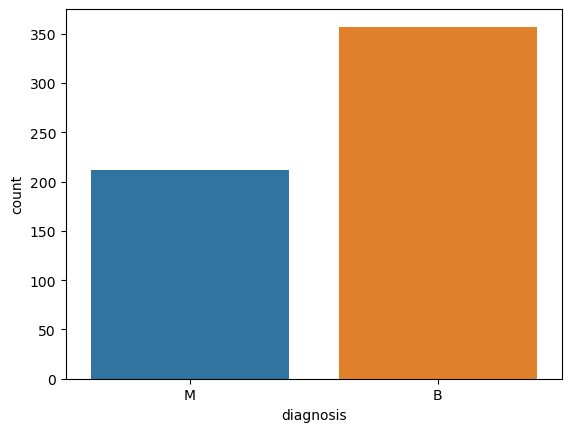

In [12]:
sns.countplot(data=data,x='diagnosis')

## 2.Numerical features

In [13]:
# Numerical feature
numerical_feature=[feature for feature in data.columns if data[feature].dtypes != 'O']
print(numerical_feature)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


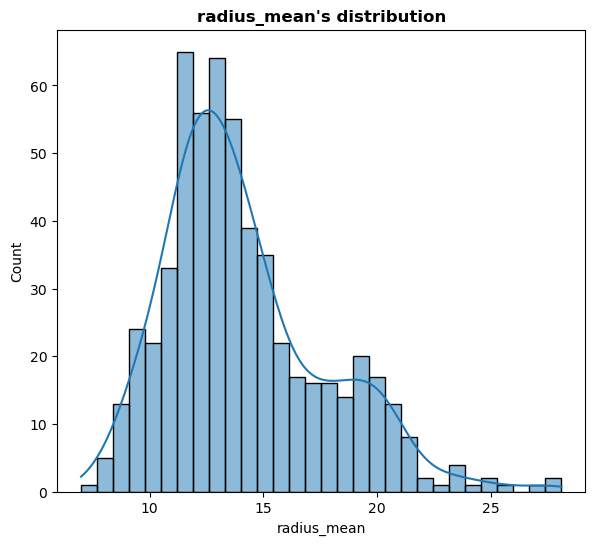

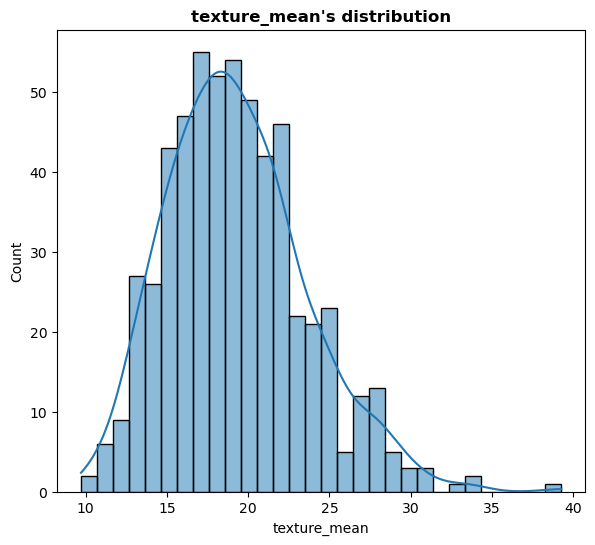

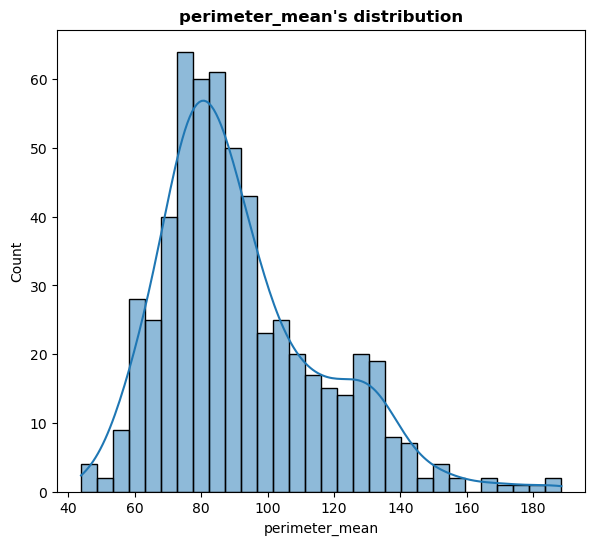

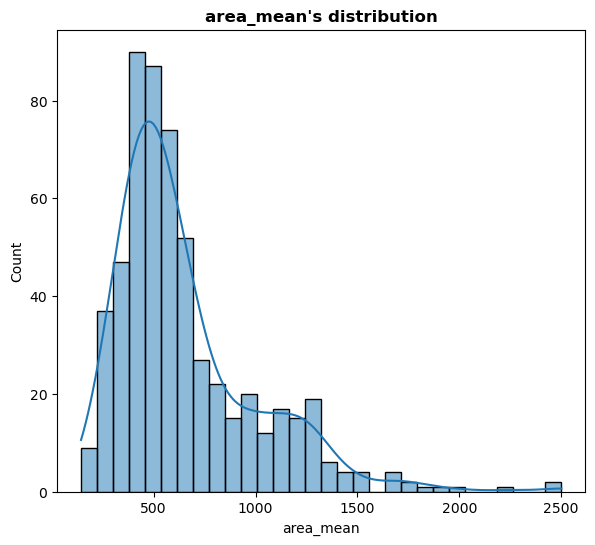

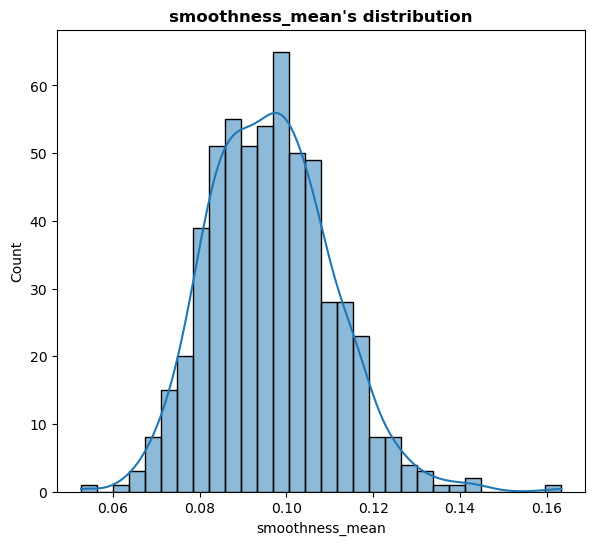

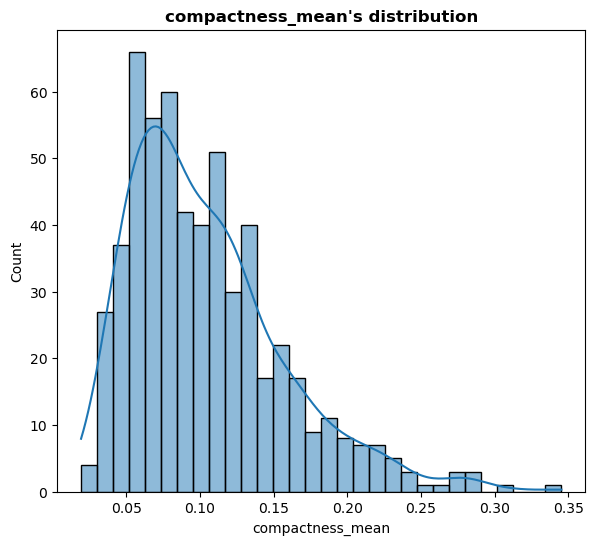

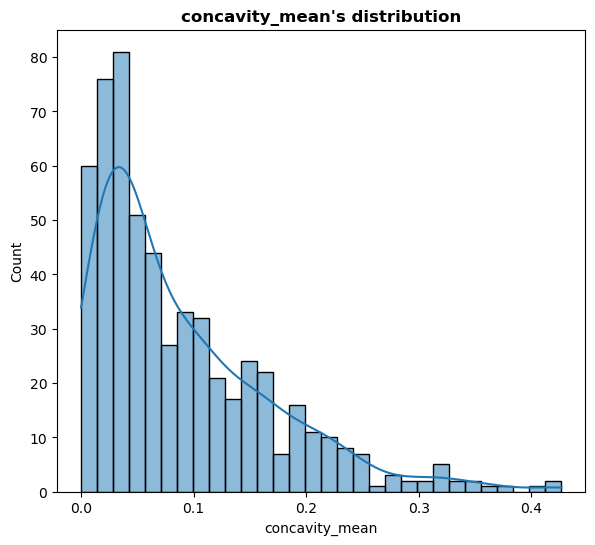

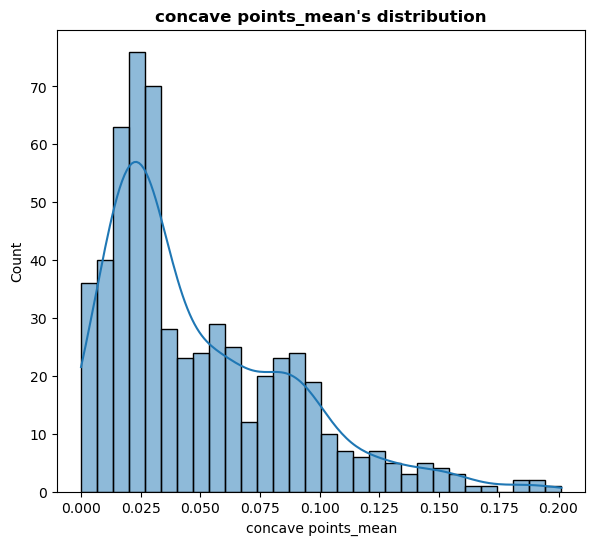

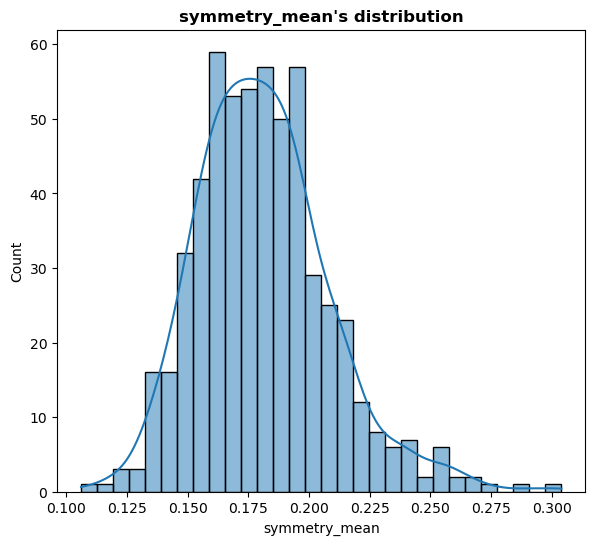

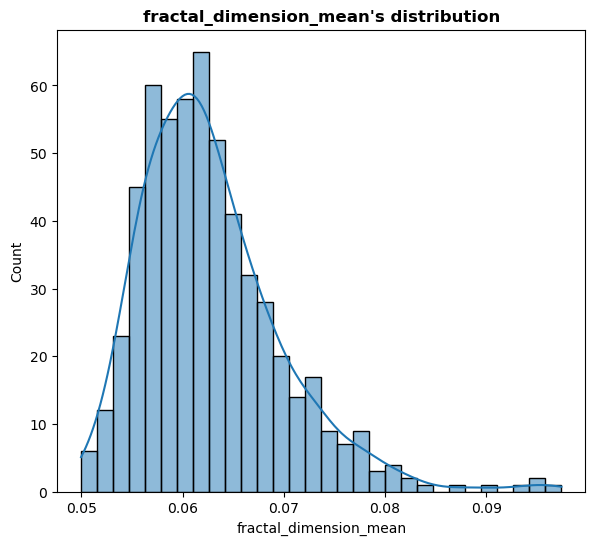

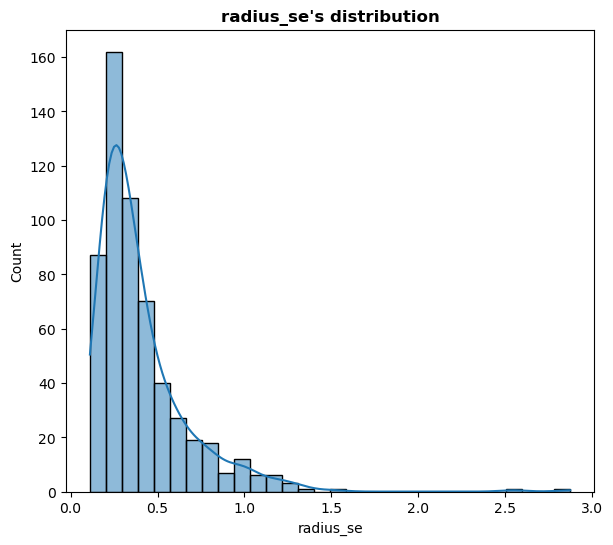

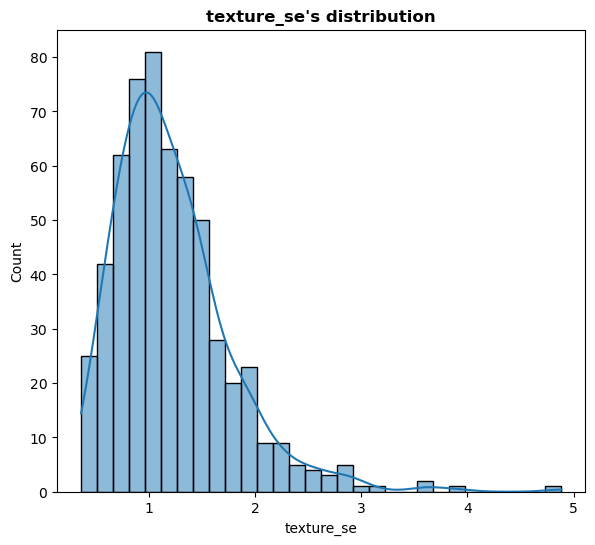

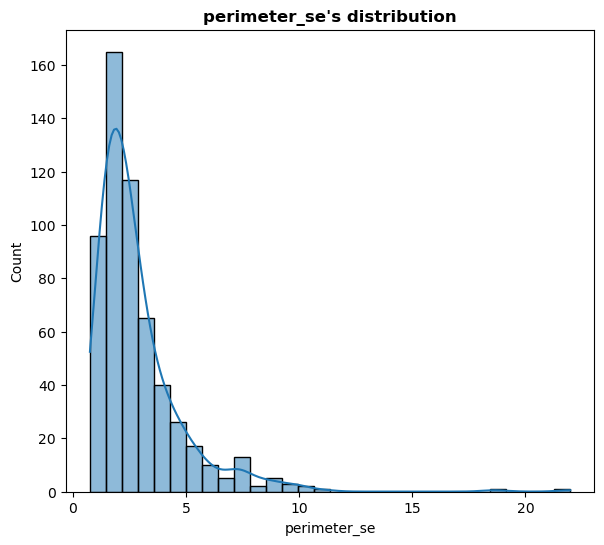

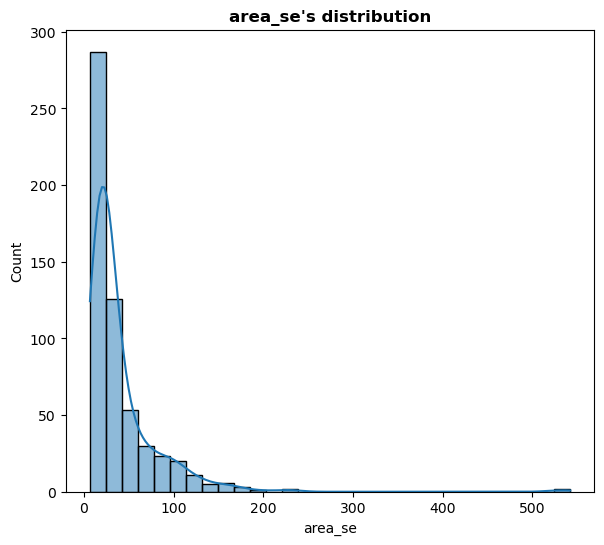

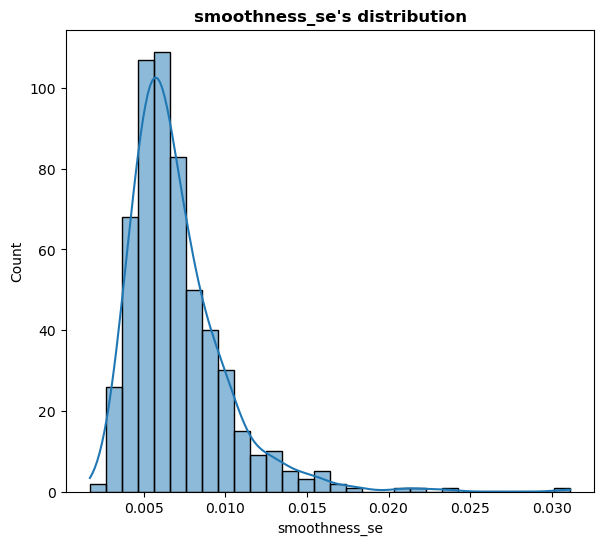

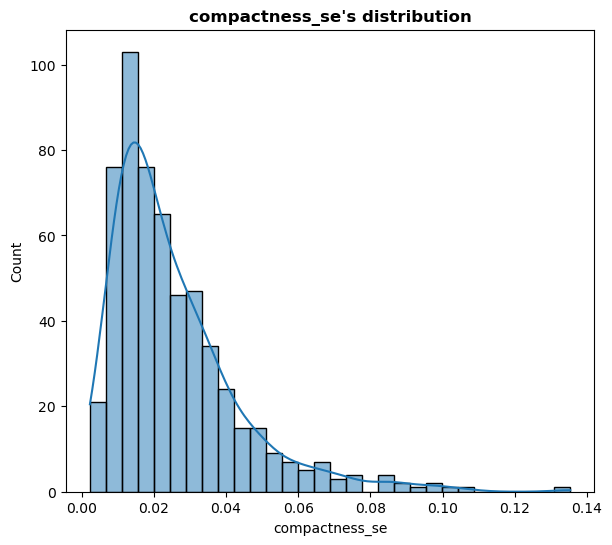

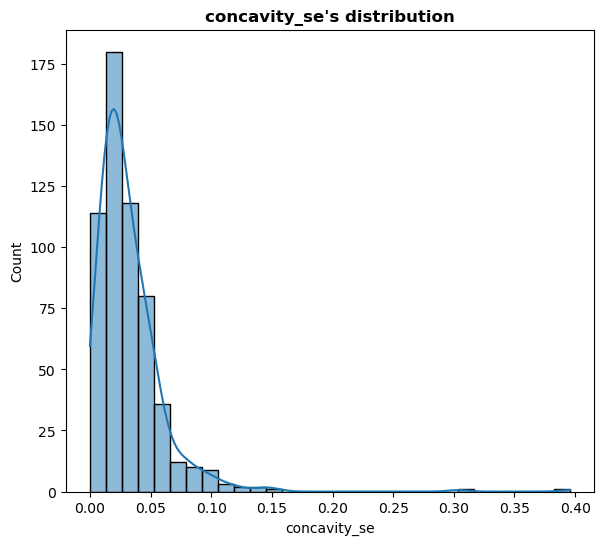

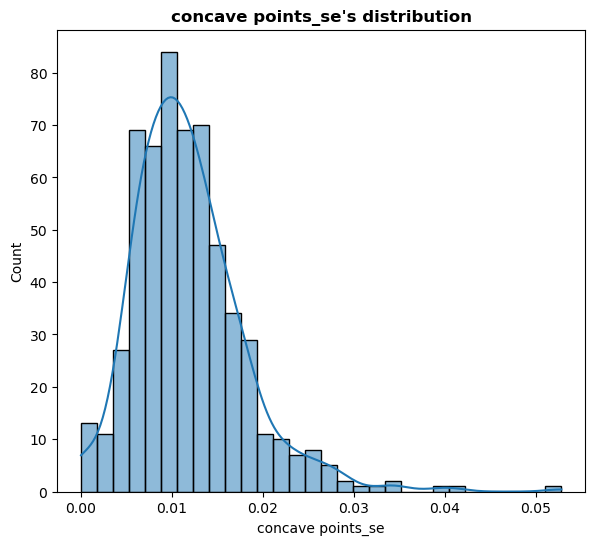

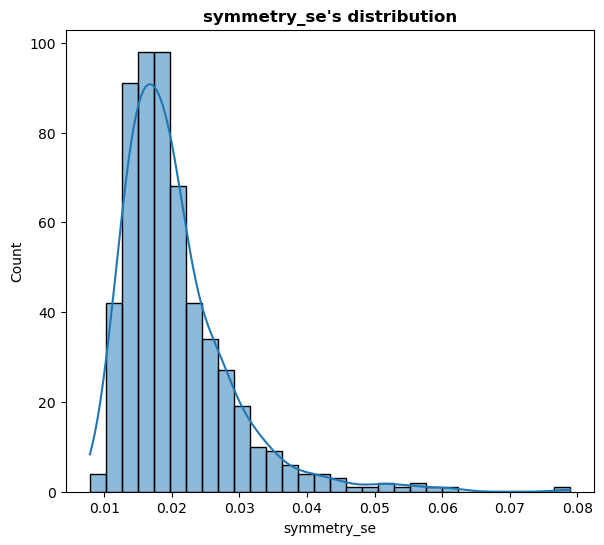

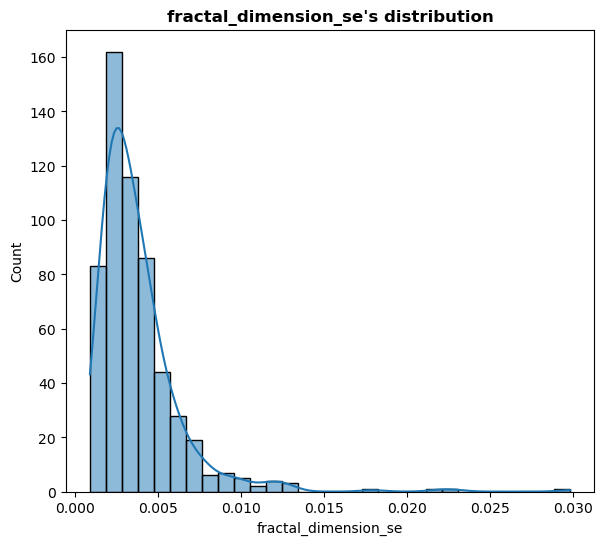

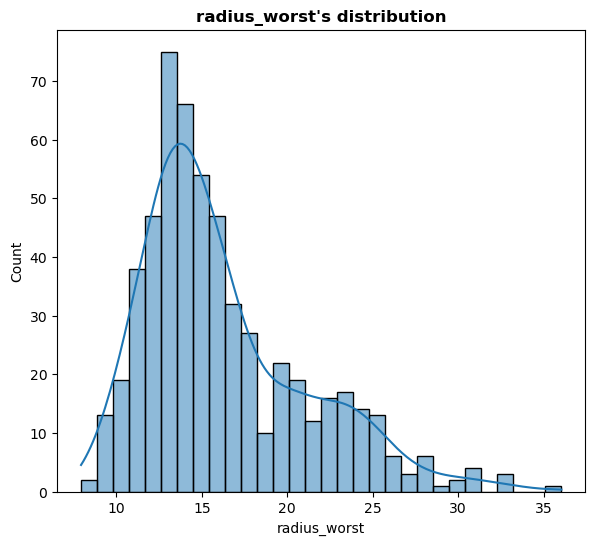

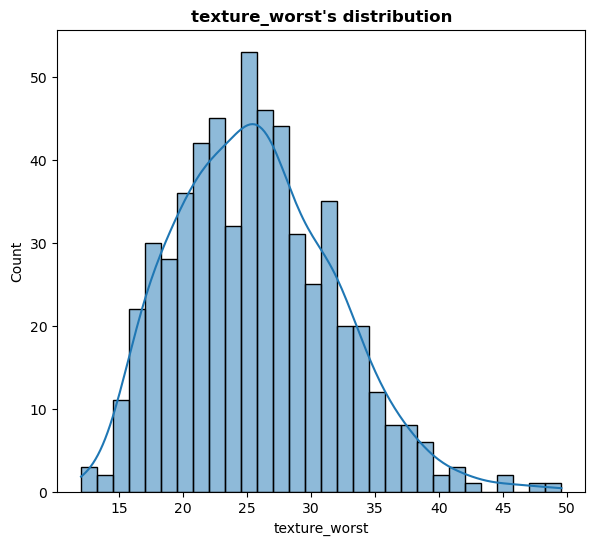

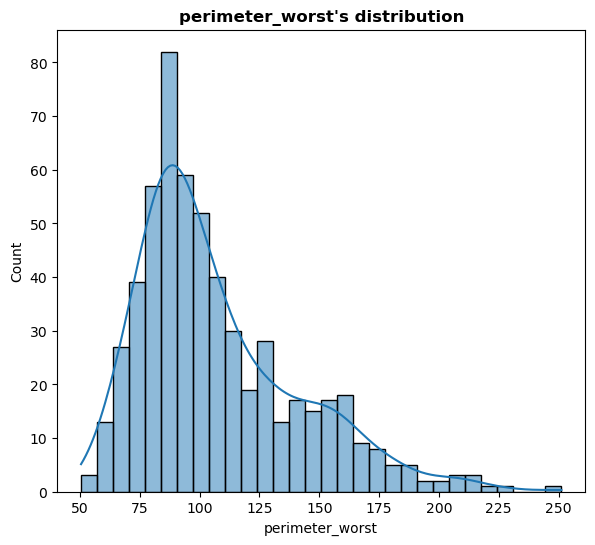

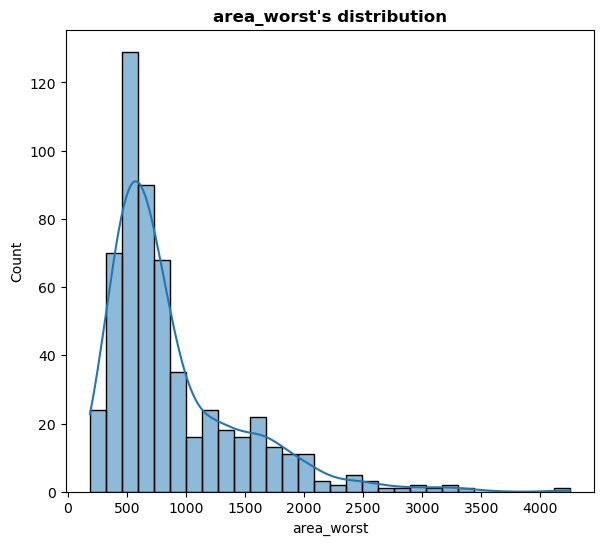

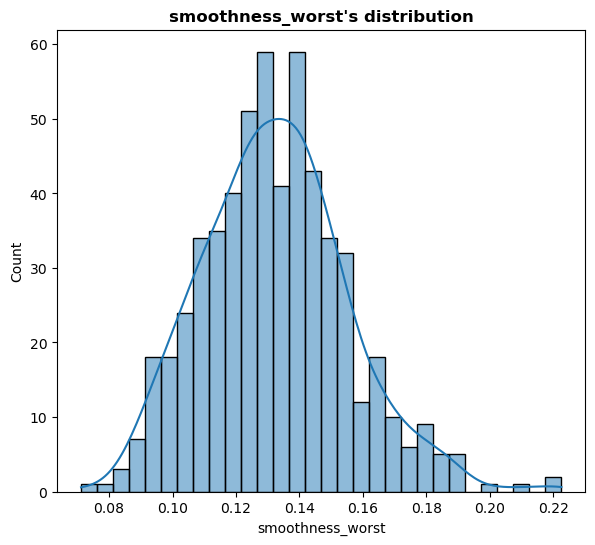

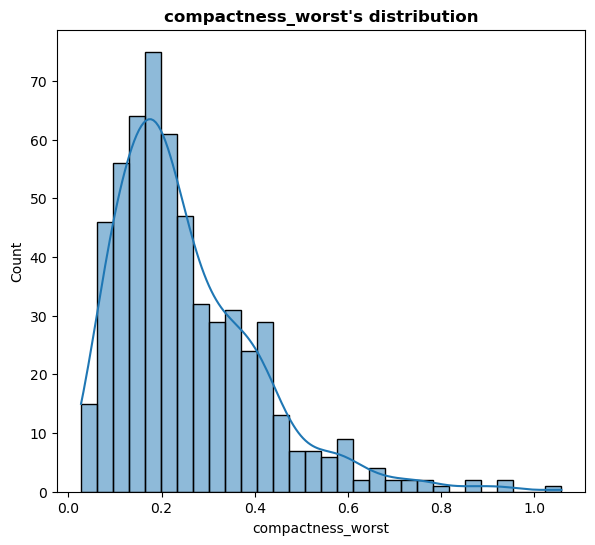

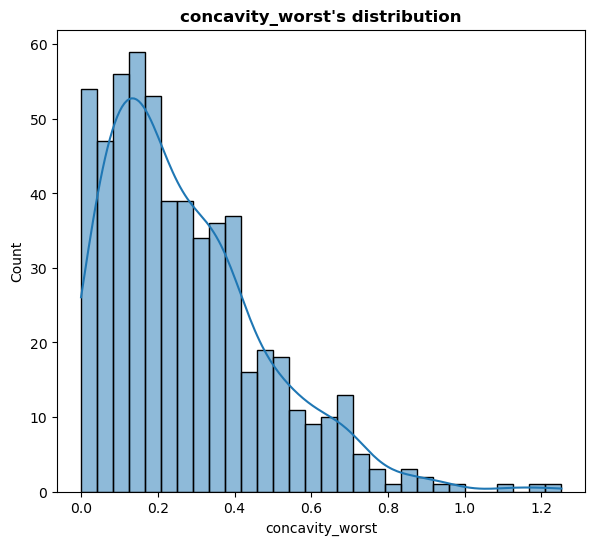

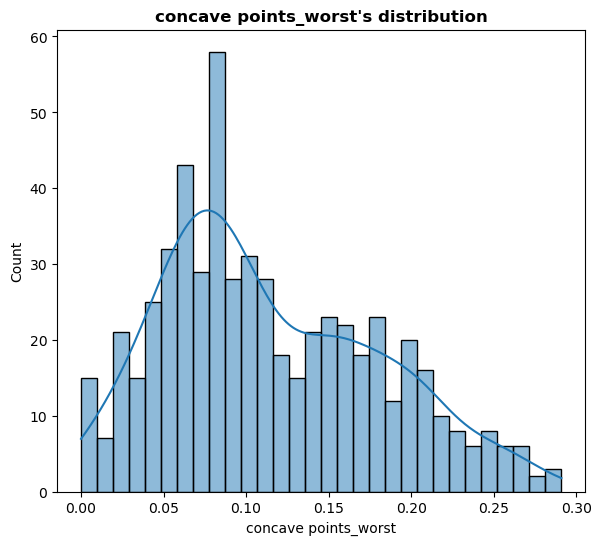

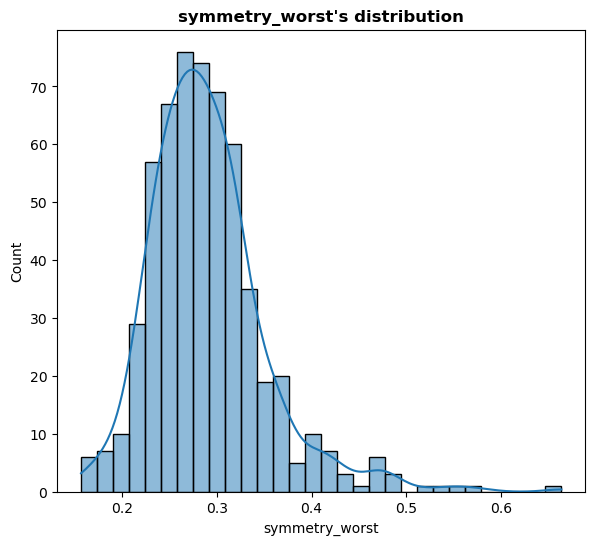

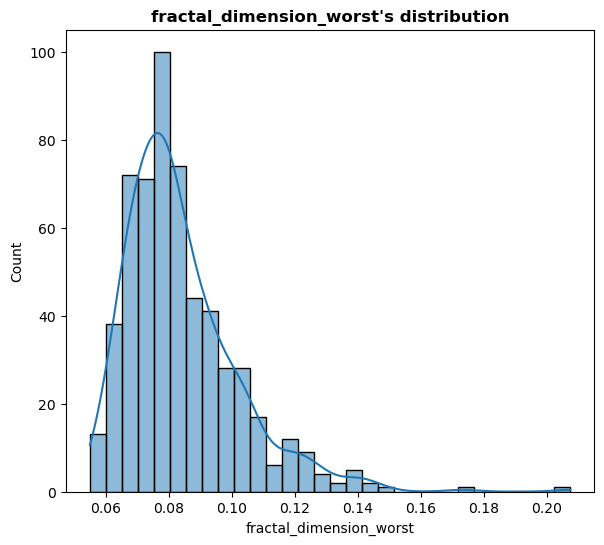

In [14]:
# checking distribution of comtinuous features
for i in numerical_feature:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=data, x=i, kde=True, bins=30)
    plt.title("{}'s distribution".format(i),fontweight="bold")
    
    plt.show();

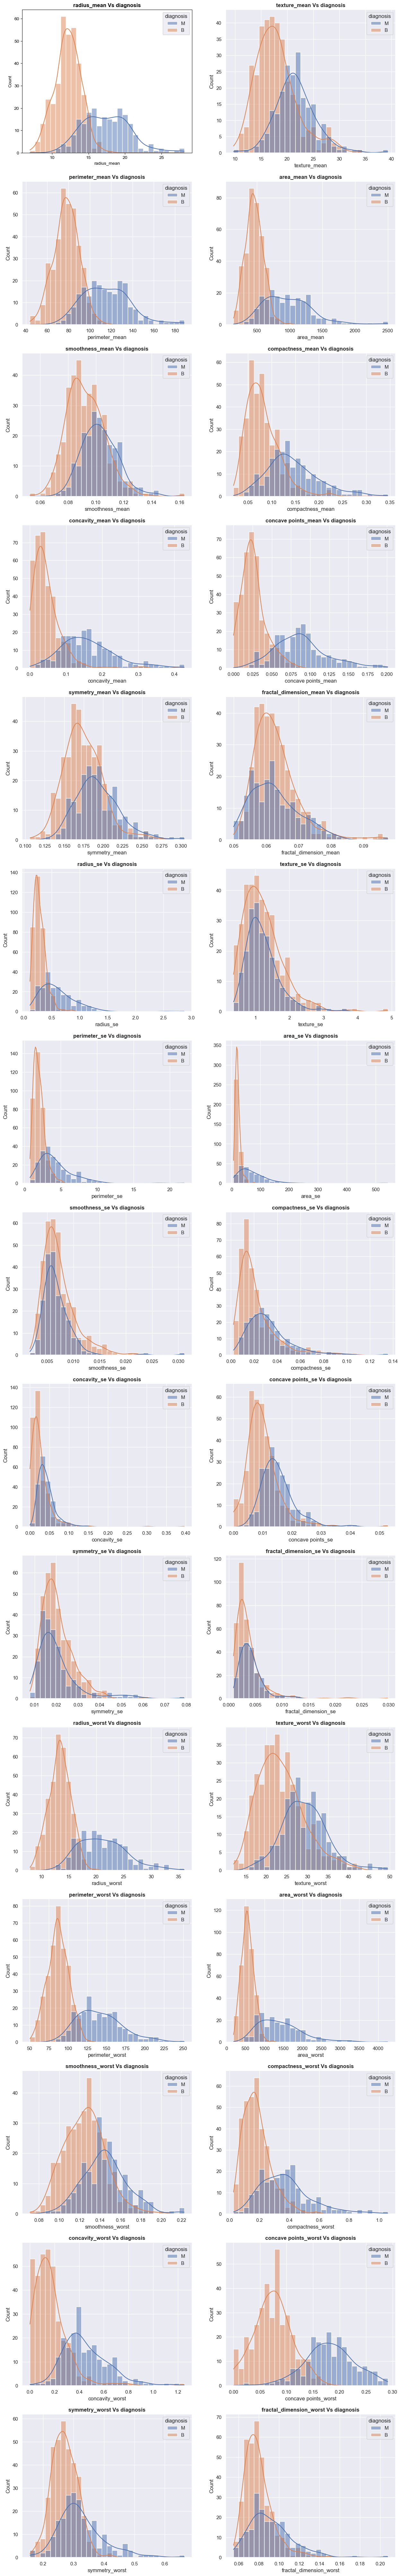

In [15]:
### Comparing Continuous numerical features with Classes

plt.figure(figsize=(15,110))
for i in enumerate(numerical_feature):
    plt.subplot(16, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.histplot(data=data, x=i[1], kde=True, bins=30, color='blue', hue='diagnosis')
    plt.title("{} Vs diagnosis".format(i[1]),fontweight="bold")

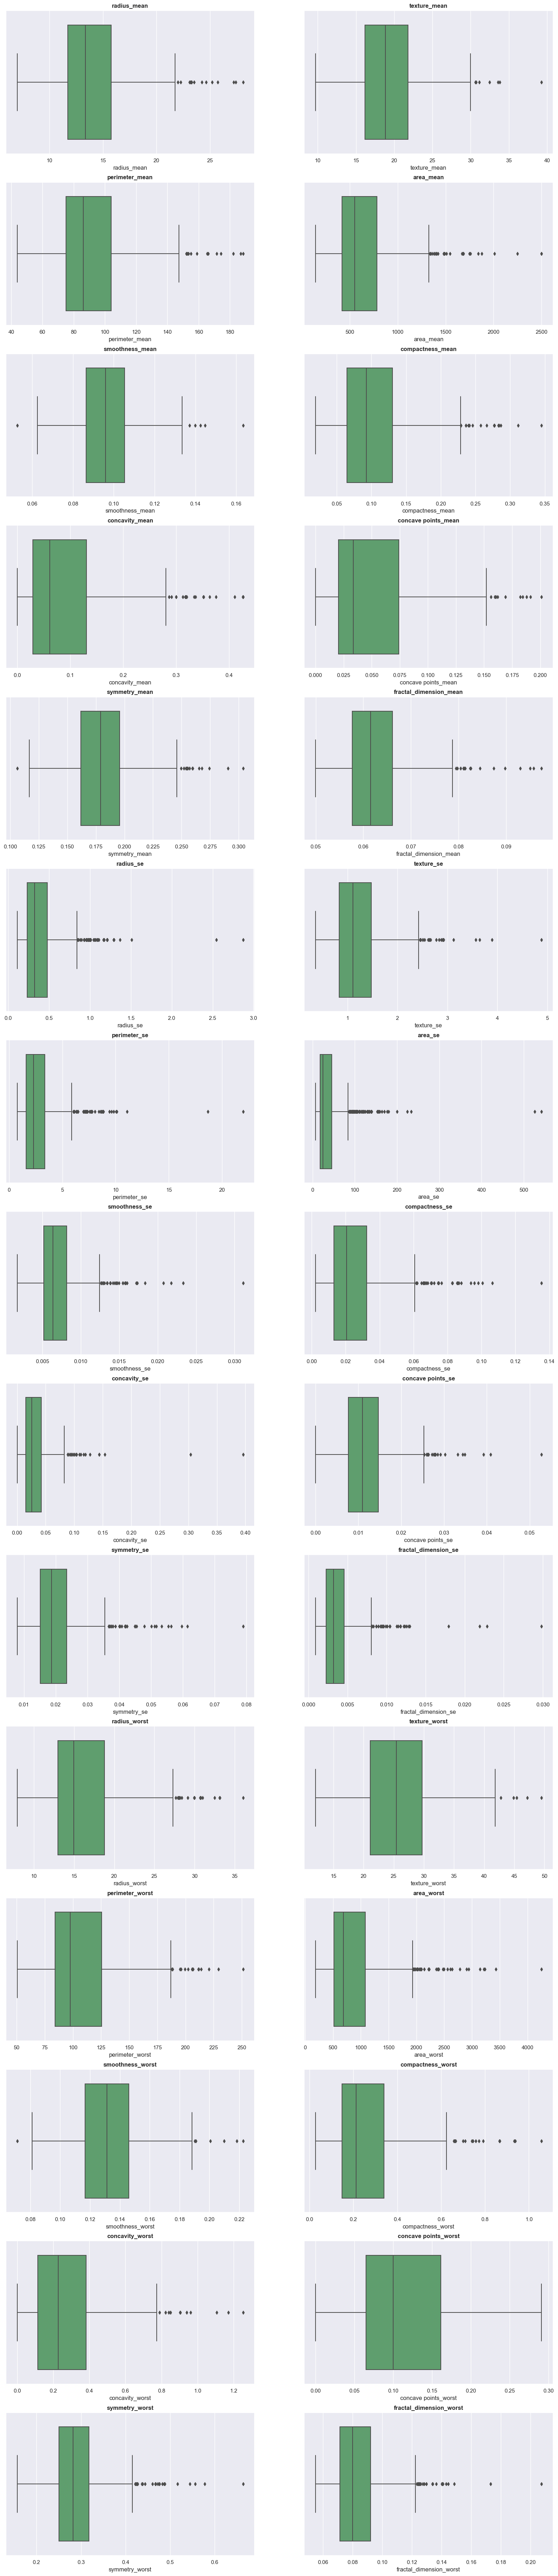

In [16]:
### Checking outliers in numerical features

plt.figure(figsize=(20,100))
for i in enumerate(numerical_feature):
    plt.subplot(16, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=data, x=i[1], color='g')
    plt.title("{}".format(i[1]), fontweight="bold")

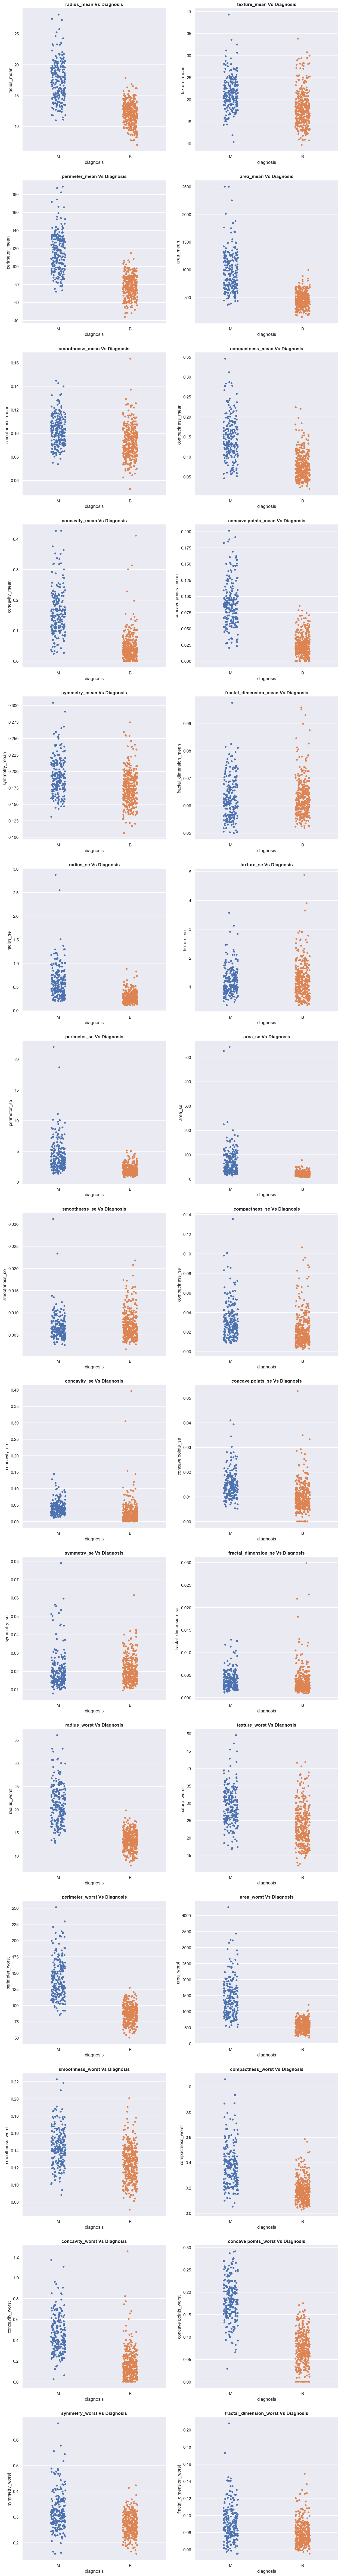

In [17]:
plt.figure(figsize=(15,130))
for i in enumerate(numerical_feature):
    plt.subplot(16, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(7,8)})
    sns.stripplot(data=data, y=i[1], x='diagnosis')
    plt.title("{} Vs Diagnosis".format(i[1]), fontweight="bold")

In [18]:
corr= round(data[numerical_feature+['diagnosis']].corr(),2)
corr

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                     1.00          0.32            1.00       0.99   
texture_mean                    0.32          1.00            0.33       0.32   
perimeter_mean                  1.00          0.33            1.00       0.99   
area_mean                       0.99          0.32            0.99       1.00   
smoothness_mean                 0.17         -0.02            0.21       0.18   
compactness_mean                0.51          0.24            0.56       0.50   
concavity_mean                  0.68          0.30            0.72       0.69   
concave points_mean             0.82          0.29            0.85       0.82   
symmetry_mean                   0.15          0.07            0.18       0.15   
fractal_dimension_mean         -0.31         -0.08           -0.26      -0.28   
radius_se                       0.68          0.28            0.69       0.73   
texture_se                     -0.10          0.39           -0.09      -0.07   
perimeter_se                    0.67          0.28            0.69       0.73   
area_se                         0.74          0.26            0.74       0.80   
smoothness_se                  -0.22          0.01           -0.20      -0.17   
compactness_se                  0.21          0.19            0.25       0.21   
concavity_se                    0.19          0.14            0.23       0.21   
concave points_se               0.38          0.16            0.41       0.37   
symmetry_se                    -0.10          0.01           -0.08      -0.07   
fractal_dimension_se           -0.04          0.05           -0.01      -0.02   
radius_worst                    0.97          0.35            0.97       0.96   
texture_worst                   0.30          0.91            0.30       0.29   
perimeter_worst                 0.97          0.36            0.97       0.96   
area_worst                      0.94          0.34            0.94       0.96   
smoothness_worst                0.12          0.08            0.15       0.12   
compactness_worst               0.41          0.28            0.46       0.39   
concavity_worst                 0.53          0.30            0.56       0.51   
concave points_worst            0.74          0.30            0.77       0.72   
symmetry_worst                  0.16          0.11            0.19       0.14   
fractal_dimension_worst         0.01          0.12            0.05       0.00   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                         0.17              0.51            0.68   
texture_mean                       -0.02              0.24            0.30   
perimeter_mean                      0.21              0.56            0.72   
area_mean                           0.18              0.50            0.69   
smoothness_mean                     1.00              0.66            0.52   
compactness_mean                    0.66              1.00            0.88   
concavity_mean                      0.52              0.88            1.00   
concave points_mean                 0.55              0.83            0.92   
symmetry_mean                       0.56              0.60            0.50   
fractal_dimension_mean              0.58              0.57            0.34   
radius_se                           0.30              0.50            0.63   
texture_se                          0.07              0.05            0.08   
perimeter_se                        0.30              0.55            0.66   
area_se                             0.25              0.46            0.62   
smoothness_se                       0.33              0.14            0.10   
compactness_se                      0.32              0.74            0.67   
concavity_se                        0.25              0.57            0.69   
concave points_se                   0.38              0.64            0.68   
symmetry_se                    

<AxesSubplot:>

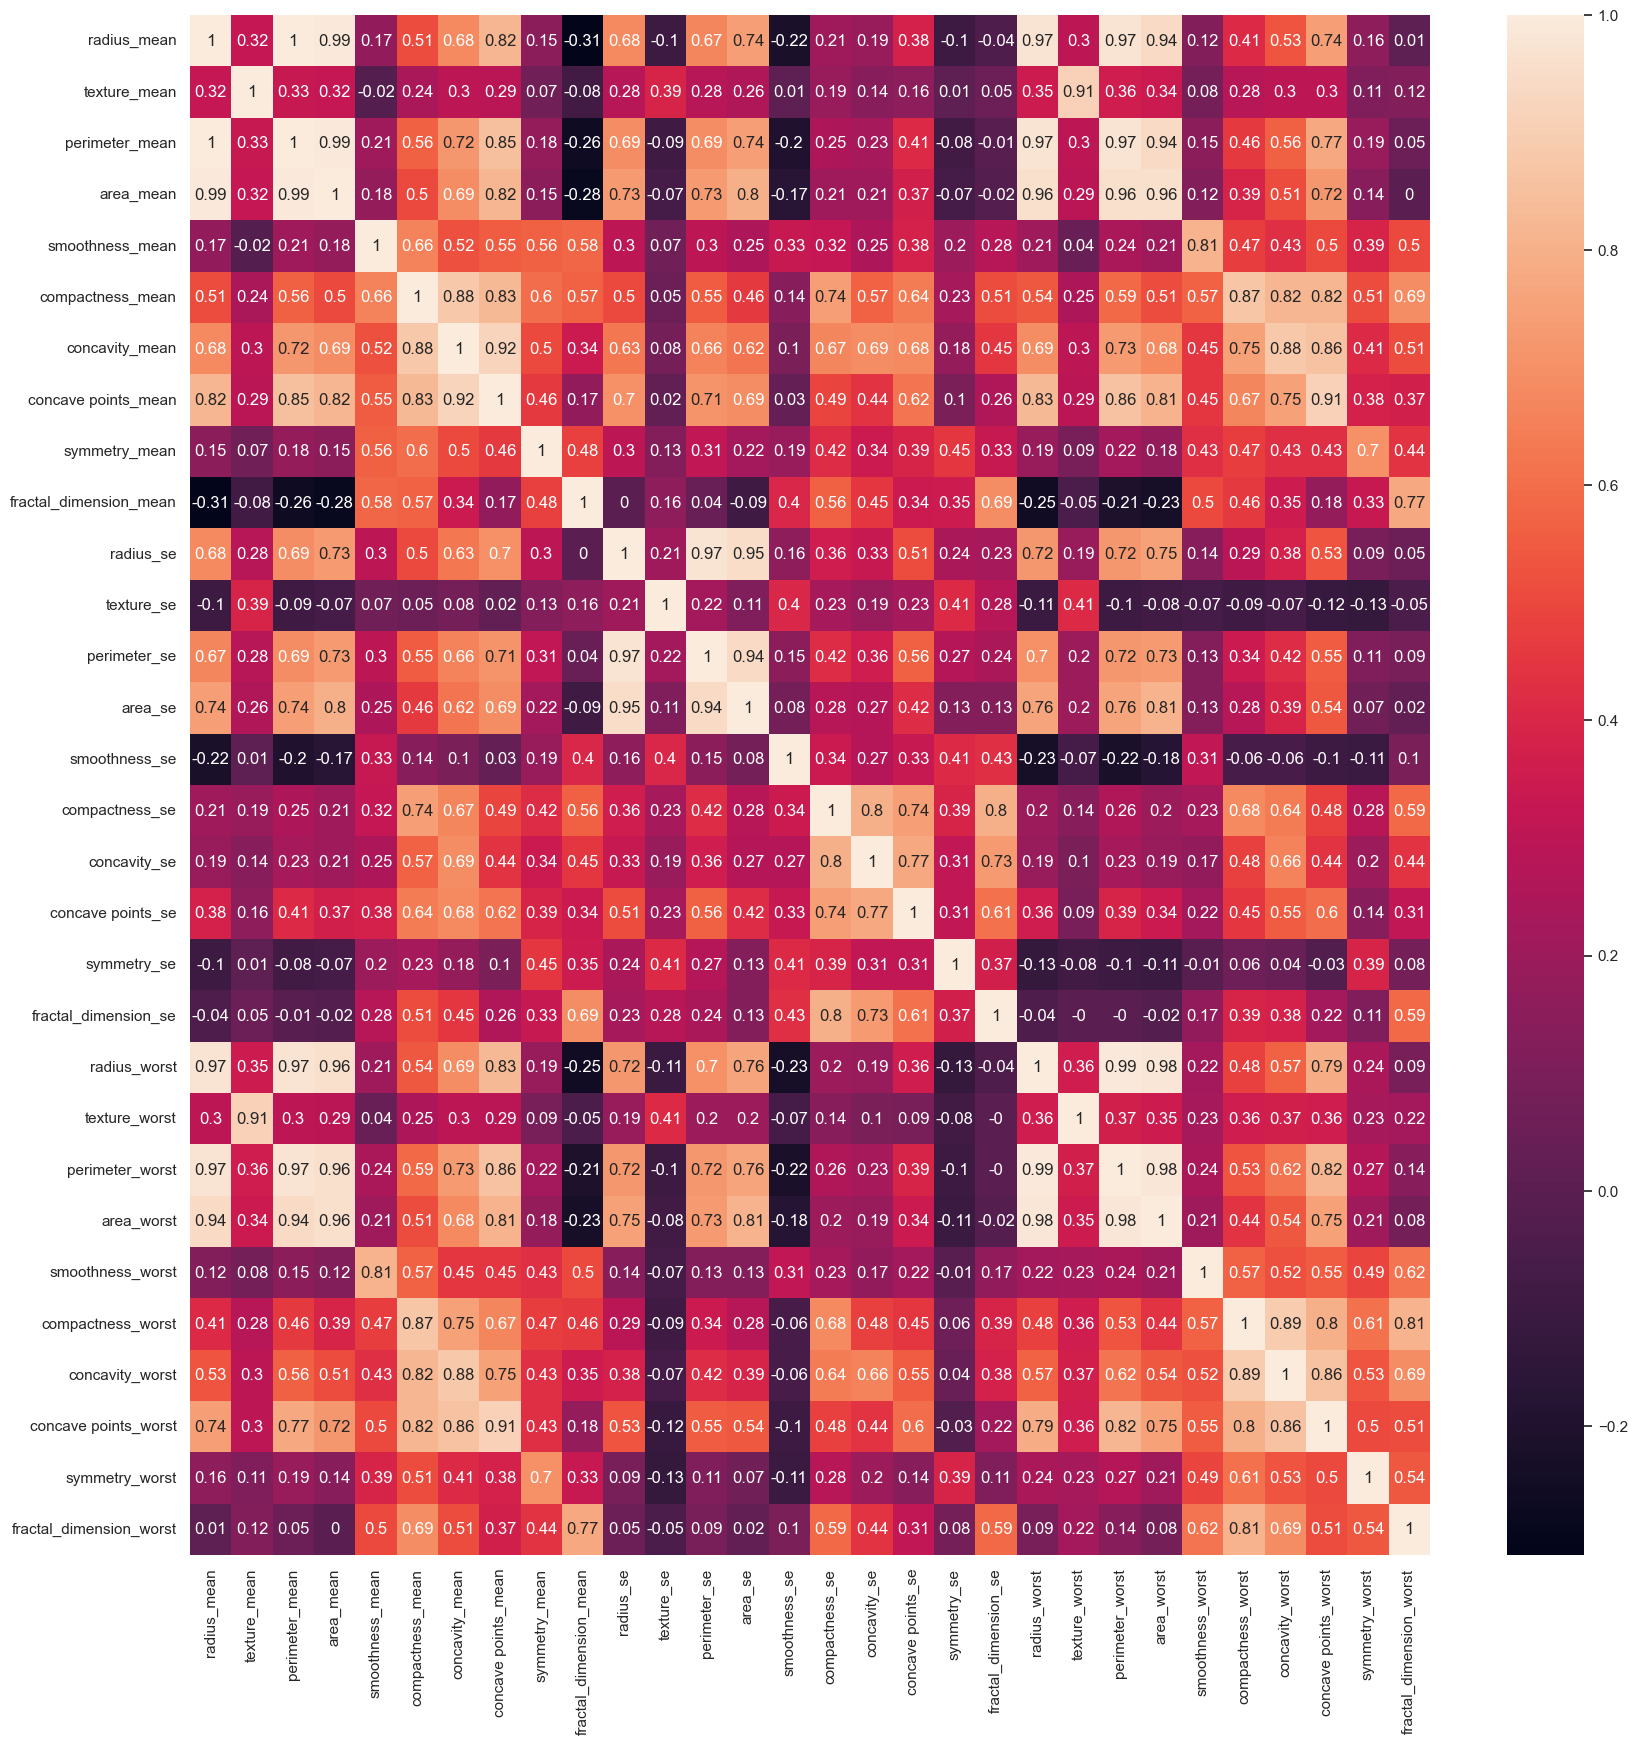

In [19]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(data=corr, annot=True)

In [23]:
df=data.copy()

In [24]:
df['diagnosis']=df['diagnosis'].replace('B','0')
df['diagnosis']=df['diagnosis'].replace('M','1')
df['diagnosis']=df.diagnosis.astype('int64')

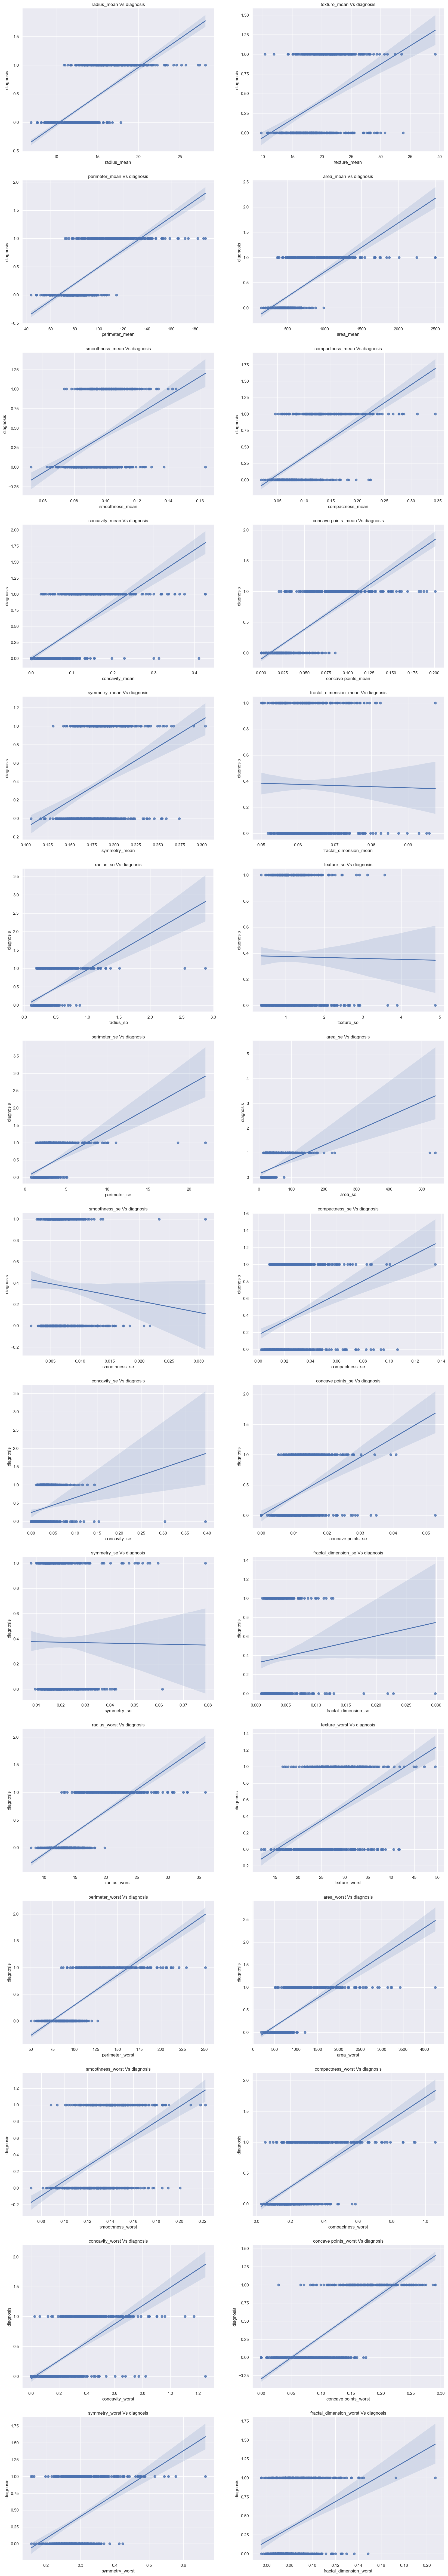

In [25]:
plt.figure(figsize=(20,130))
for i in enumerate(numerical_feature):
    plt.subplot(16, 2, i[0]+1)
    sns.set(rc={'figure.figsize':(8,10)})
    sns.regplot(data=df, x=i[1], y='diagnosis')
    plt.xlabel(i[1])
    plt.ylabel("diagnosis")
    plt.title("{} Vs diagnosis".format(i[1]))


## Model Builiding

In [26]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [27]:
X=df.iloc[:,1:]
y=df.iloc[:,:1]

In [28]:
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [29]:
y.head()

diagnosis
0          1
1          1
2          1
3          1
4          1

## spliting data into Training and Test data

In [30]:
# random state train test split will be same with all people using random_state=19

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)


In [31]:
X_train.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
394       12.100         17.72           78.07      446.2          0.10290   
202       23.290         26.67          158.90     1685.0          0.11410   
221       13.560         13.90           88.59      561.3          0.10510   
103        9.876         19.40           63.95      298.3          0.10050   
513       14.580         13.66           94.29      658.8          0.09832   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
394           0.09758         0.04783              0.03326         0.1937   
202           0.20840         0.35230              0.16200         0.2200   
221           0.11920         0.07860              0.04451         0.1962   
103           0.09697         0.06154              0.03029         0.1945   
513           0.08918         0.08222              0.04349         0.1739   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
394                 0.06161  ...         13.56          25.80   
202                 0.06229  ...         25.12          32.68   
221                 0.06303  ...         14.98          17.13   
103                 0.06322  ...         10.76          26.83   
513                 0.05640  ...         16.76          17.24   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
394            88.33       559.5            0.1432             0.1773   
202           177.00      1986.0            0.1536             0.4167   
221           101.10       686.6            0.1376             0.2698   
103            72.22       361.2            0.1559             0.2302   
513           108.50       862.0            0.1223             0.1928   

     concavity_worst  concave points_worst  symmetry_worst  \
394           0.1603               0.06266          0.3049   
202           0.7892               0.27330          0.3198   
221           0.2577               0.09090          0.3065   
103           0.2644               0.09749          0.2622   
513           0.2492               0.09186          0.2626   

     fractal_dimension_worst  
394                  0.07081  
202                  0.08762  
221                  0.08177  
103                  0.08490  
513                  0.07048  

[5 rows x 30 columns]

In [32]:
y_train.head()

diagnosis
394          0
202          1
221          0
103          0
513          0

In [33]:
X_test.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
37        13.030         18.42           82.61      523.8          0.08983   
129       19.790         25.12          130.40     1192.0          0.10150   
62        14.250         22.15           96.42      645.7          0.10490   
544       13.870         20.70           89.77      584.8          0.09578   
553        9.333         21.94           59.01      264.0          0.09240   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
37            0.03766         0.02562              0.02923         0.1467   
129           0.15890         0.25450              0.11490         0.2202   
62            0.20080         0.21350              0.08653         0.1949   
544           0.10180         0.03688              0.02369         0.1620   
553           0.05605         0.03996              0.01282         0.1692   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
37                  0.05863  ...        13.300          22.81   
129                 0.06113  ...        22.630          33.58   
62                  0.07292  ...        17.670          29.51   
544                 0.06688  ...        15.050          24.75   
553                 0.06576  ...         9.845          25.05   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
37             84.46       545.9           0.09701            0.04619   
129           148.70      1589.0           0.12750            0.38610   
62            119.10       959.5           0.16400            0.62470   
544            99.17       688.6           0.12640            0.20370   
553            62.86       295.8           0.11030            0.08298   

     concavity_worst  concave points_worst  symmetry_worst  \
37           0.04833               0.05013          0.1987   
129          0.56730               0.17320          0.3305   
62           0.69220               0.17850          0.2844   
544          0.13770               0.06845          0.2249   
553          0.07993               0.02564          0.2435   

     fractal_dimension_worst  
37                   0.06169  
129                  0.08465  
62                   0.11320  
544                  0.08492  
553                  0.07393  

[5 rows x 30 columns]

In [34]:
y_test.head()

diagnosis
37           0
129          1
62           1
544          0
553          0

In [35]:
X_train.shape, y_train.shape


((426, 30), (426, 1))

In [36]:
X_test.shape, y_test.shape


((143, 30), (143, 1))

# Standardisation/Feature scaling

In [37]:
scaler=StandardScaler()
scaler

StandardScaler()

In [38]:
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.56320634, -0.33858826, -0.56197368, ..., -0.79907328,
         0.19452361, -0.75298811],
       [ 2.64669082,  1.73717104,  2.80948066, ...,  2.40906656,
         0.42875344,  0.16254587],
       [-0.14439938, -1.2245548 , -0.12317992, ..., -0.36896566,
         0.21967581, -0.15606649],
       ...,
       [-0.16161063, -1.50054962, -0.24414017, ..., -1.41681992,
        -1.03479003, -1.23716997],
       [-0.15013646, -1.11786773, -0.17031271, ...,  0.20826801,
         0.08133872, -0.65604281],
       [-0.83858626, -1.18512697, -0.84685594, ..., -1.15607479,
        -0.54903822, -0.78730021]])

In [39]:
X_test=scaler.transform(X_test)
X_test

array([[-2.96432044e-01, -1.76238373e-01, -3.72608310e-01, ...,
        -9.89910694e-01, -1.47495347e+00, -1.24969661e+00],
       [ 1.64270154e+00,  1.37768200e+00,  1.62073330e+00, ...,
         8.84499533e-01,  5.96958763e-01,  7.88828001e-04],
       [ 5.35299342e-02,  6.88854610e-01,  2.03412776e-01, ...,
         9.65220864e-01, -1.27738917e-01,  1.55572607e+00],
       ...,
       [-6.34919859e-01, -3.98889650e-01, -6.67501074e-01, ...,
        -3.61350443e-01,  2.76268250e-01, -7.93291208e-01],
       [-8.21375011e-01,  2.36337776e+00, -8.70630885e-01, ...,
        -1.75341264e+00, -2.13677066e+00, -1.39348064e+00],
       [ 2.31379464e-01, -5.82113097e-01,  2.96009938e-01, ...,
         1.33379751e+00,  1.03712221e+00,  1.19081961e+00]])

here using transform only to avoid data leakage
(training mean and training std will be used for standardisation

In [40]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

## Model

## Logistic Regression

In [41]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression()

In [42]:
logistic_reg

LogisticRegression()

In [43]:
logistic_reg.fit(X_train,y_train)

LogisticRegression()

## Prediction for Test data

In [44]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

## Performance Matrix

## 1.Confusion Matrix

In [45]:
confusion_matrix=confusion_matrix(y_test, logistic_reg_pred)
confusion_matrix

array([[83,  2],
       [ 3, 55]], dtype=int64)

In [46]:
truly_positive=confusion_matrix[0][0]
falsely_positive=confusion_matrix[0][1]
falsely_negative=confusion_matrix[1][0]
truly_negative=confusion_matrix[1][1]

## 2.Accuracy

In [47]:
### accuracy using accuracy_score
accuracy=round(accuracy_score(y_test, logistic_reg_pred))
accuracy

1

In [48]:
### manual calcualtion for accuracy
accuracy_manual=round(((truly_positive+truly_negative)/(truly_positive+falsely_positive+falsely_negative+truly_negative)),4)
print("Accuracy of our model is {}".format(accuracy_manual))

Accuracy of our model is 0.965


## 3.Precision score

In [49]:
precision_manual=round(truly_positive/(truly_positive+falsely_positive))
print("Precision of our model is {}".format(precision_manual))

Precision of our model is 1


## 4.Recall score

In [50]:
recall_manual=round(truly_positive/(truly_positive+falsely_negative))
print("Recall of our model is {}".format(recall_manual))

Recall of our model is 1


## 5.F-1 score

## Giving equal importance to falsely positive and falsely negative

In [51]:
f1_score=2*(precision_manual*recall_manual)/(precision_manual+recall_manual)
print("F-1 Score of our model is {} ".format(round(f1_score)))

F-1 Score of our model is 1 


## 6.Classification Report

In [52]:
print(classification_report(y_test, logistic_reg_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97        85
           1       0.96      0.95      0.96        58

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



## Pickling the model file for deployment

In [57]:
import pickle

In [58]:
pickle.dump(regression,open('regmodel.pkl','wb'))

NameError: name 'regression' is not defined